<a href="https://colab.research.google.com/github/Gsantos4/files/blob/main/Example_Resize_bb_and_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original image dimensions = (1440, 1920, 3)
Scale: x = 0.3333333333333333, y = 0.4444444444444444
New image shape = (640, 640, 3)
Original bounding box = 1185, 120, 1500, 700
New bounding box = 395, 53, 500, 311


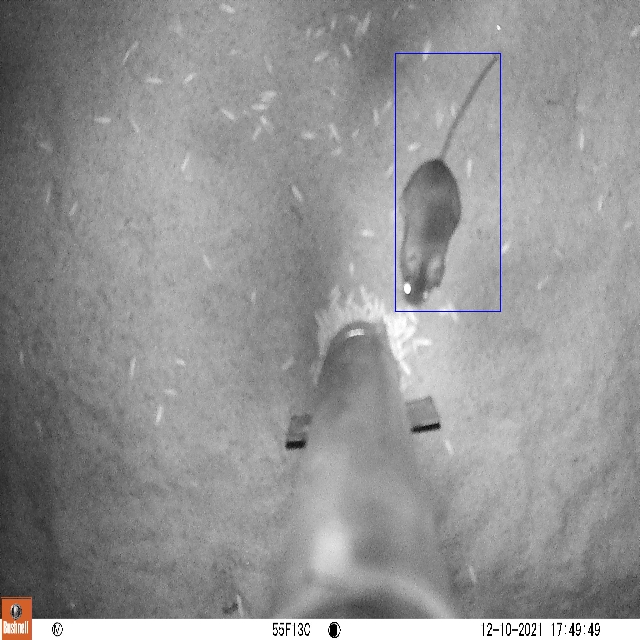

In [7]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


def drawBox(boxes, image):
    for i in range(0, len(boxes)):
        # changed color and width to make it visible
        cv2.rectangle(image, (boxes[i][2], boxes[i][3]), (boxes[i][4], boxes[i][5]), (255, 0, 0), 1)
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


def cvTest():
    imageToPredict = cv2.imread("/content/12100074.JPG", 3)
    print(f'Original image dimensions = {imageToPredict.shape}')

    y_ = imageToPredict.shape[0]
    x_ = imageToPredict.shape[1]

    targetSize = 640
    x_scale = targetSize / x_
    y_scale = targetSize / y_
    print(f'Scale: x = {x_scale}, y = {y_scale}')
    img = cv2.resize(imageToPredict, (targetSize, targetSize));
    print(f'New image shape = {img.shape}')
    img = np.array(img);

    # original frame as named values
    (origLeft, origTop, origRight, origBottom) = (1185, 120, 1500, 700)
    print(f'Original bounding box = {origLeft}, {origTop}, {origRight}, {origBottom}')

    x = int(np.round(origLeft * x_scale))
    y = int(np.round(origTop * y_scale))
    xmax = int(np.round(origRight * x_scale))
    ymax = int(np.round(origBottom * y_scale))
    # Box.drawBox([[1, 0, x, y, xmax, ymax]], img)
    print(f'New bounding box = {x}, {y}, {xmax}, {ymax}')
    drawBox([[1, 0, x, y, xmax, ymax]], img)
    


cvTest()

#SergGr
#https://stackoverflow.com/questions/49466033/resizing-image-and-its-bounding-box